# Part II - Airline on-Time Performance Data Analysis Presentation
## by Joseph Ebere

## 1.1 Investigation Overview

> In this investigation, I wanted to look at the features of the dataset with which flights delays and cancellation can be predicted. The main focus was on Cancellation and its distribution (percentage) and the day(s) of the week that have the highest rate of delays and cancellation, in order to predict the most convenient days of travel by flight. 

## 1.2 Dataset Overview

> The dataset name is "Airline On-Time Performance Data". This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delay. The dataset has records for year 1987 to 2022, but for this investigation, only year 1987 was considered. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
flight_87 = pd.read_csv("1987.csv.bz2")

In [3]:
flight_87[["DayOfWeek", "Cancelled", "Diverted"]] = flight_87[["DayOfWeek", "Cancelled", "Diverted"]].astype(str)
flight_87["DayOfWeek"] = flight_87["DayOfWeek"].replace(["1", "2", "3", "4", "5", "6", "7"], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
flight_87["Cancelled"] = flight_87["Cancelled"].replace(["0", "1"], ["No", "Yes"])
flight_87["Diverted"] = flight_87["Diverted"].replace(["0", "1"], ["No", "Yes"])
flight_87[["DepTime", "ArrTime", "ActualElapsedTime", "ArrDelay", "DepDelay", "Distance"]] = flight_87[["DepTime", "ArrTime", "ActualElapsedTime", "ArrDelay", "DepDelay", "Distance"]].fillna(0).astype(int) 

In [4]:
flight_87_plot = flight_87["Cancelled"].value_counts()
flight_87_vc = flight_87_plot.sum()

## 1.3 Distribution of flight Cancellation
> The distribution of flight cancellation, gotten by the value count of the feature, was plotted on a bar chart. The chart shows us that there was a 1.5% flight cancellation and 98.5% of No-Cancellation during the year 1987. 

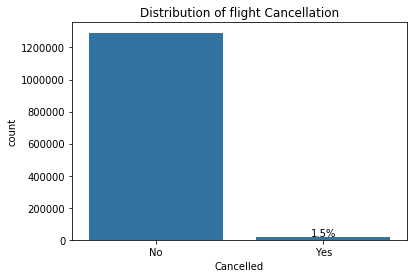

In [5]:
base_color = sb.color_palette()[0]

#plotting a bar chart of value counts for the feature "Cancelled" for the year 1987, indicating the percentage proportion of the bar
sb.countplot(data = flight_87, x = "Cancelled", color = base_color)
type_counts = flight_87_plot
locs, labels = plt.xticks(rotation = 360)
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = "{:.2}%".format(100*count/flight_87_vc)
plt.text(loc, count+1, pct_string, ha = "center", color = "black")
plt.title("Distribution of flight Cancellation");

### 1.4 Arrival Delay by Distance

> Arrival delay tells us the additional time from the scheduled time it took a flight to arrive. The distance shows the distance travelled by the flight. The scatter plot shows us that there is no relationship between the distance travelled and the arrival delay.

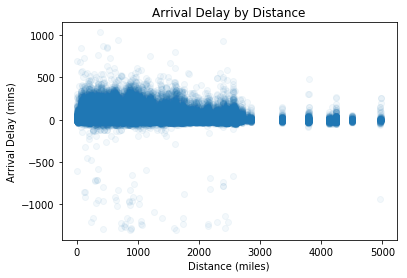

In [6]:
plt.scatter(data = flight_87, x = "Distance", y = "ArrDelay", alpha = 1/20)
plt.title("Arrival Delay by Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Arrival Delay (mins)");

## 1.5 Departure Delay by Distance
> Departure delay tells us the additional time from the scheduled time it took a flight to depart. The distance shows the distance travelled by the flight. The scatter plot shows us that there is no relationship between the distance travelled and the departure delay.

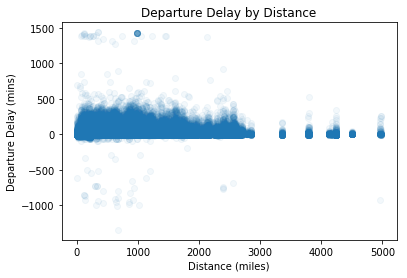

In [7]:
plt.scatter(data = flight_87, x = "Distance", y = "DepDelay", alpha = 1/20)
plt.title("Departure Delay by Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Departure Delay (mins)");

## 1.6 Arrival Delay, Departure Delay by Day of Week

> The "Day of Week" are Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday. This visualization shows us the distribution od delays across the various week days, represented on a point plot. The plot showed a positive corelation between the Arrival Delay and Departure Delay, while the delays are more prominent in weekends (between Thursdays to Sundays) as indicated by the darker shade pointd.

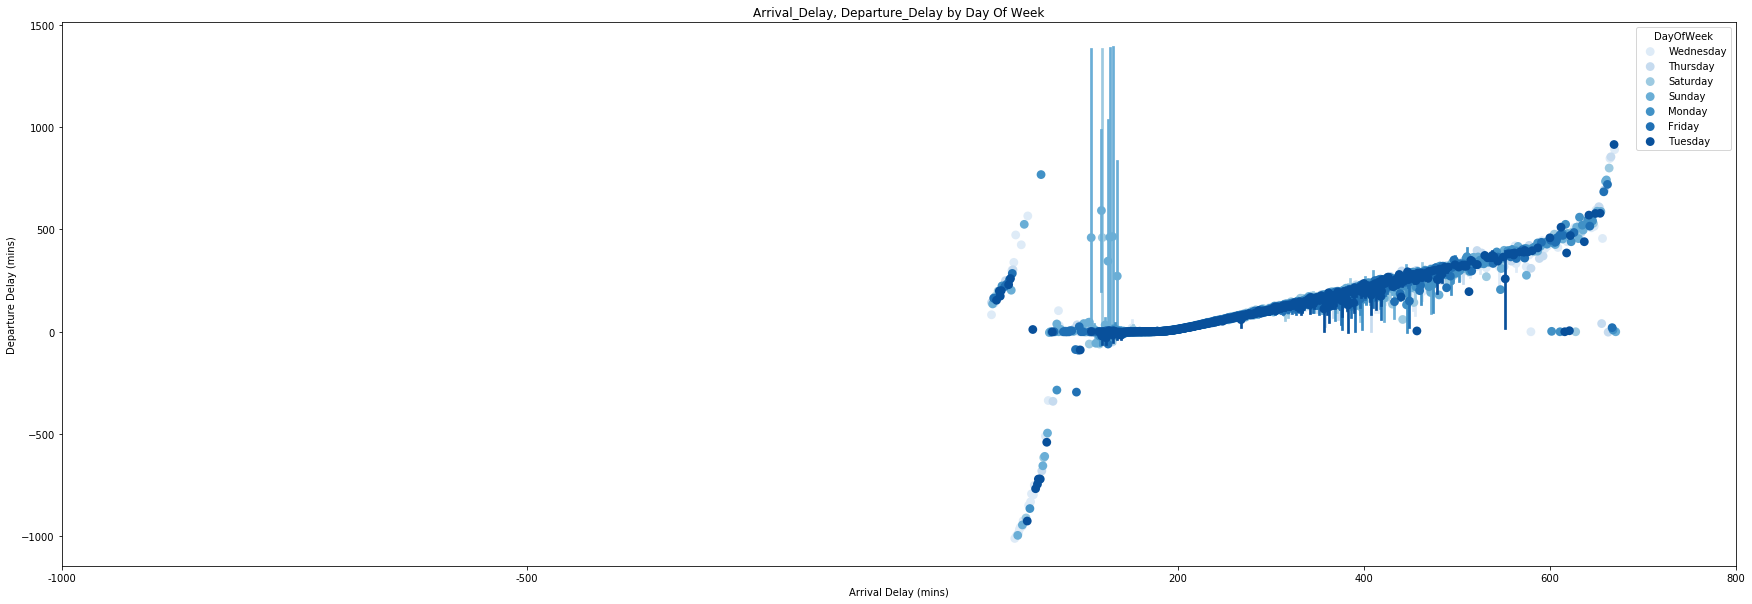

In [8]:
def my_func4(a, b, c, d):
    fig = plt.figure(figsize = [30,10])
    ax = sb.pointplot(data = a, x = b, y = c, hue = d, palette = "Blues", linestyles = "", dodge = 0.4)
    ax.set_xticks([-1000, -500, 200, 400, 600, 800])
    ax.set_xticklabels(["-1000", "-500", "200", "400", "600", "800"])
    ax.set_title("Arrival_Delay, Departure_Delay by Day Of Week")
    ax.set_xlabel("Arrival Delay (mins)")
    ax.set_ylabel("Departure Delay (mins)")
    
ArrDelay = flight_87["ArrDelay"]
DepDelay = flight_87["DepDelay"]
DayOfWeek = flight_87["DayOfWeek"]
my_func4(flight_87, ArrDelay, DepDelay, DayOfWeek);

In [9]:
!jupyter nbconvert --version

5.4.0


In [ ]:
!jupyter nbconvert Part_II_Project_slide_deck.ipynb --to slides --post serve --no-input --no-p

[NbConvertApp] Converting notebook Part_II_Project_slide_deck.ipynb to slides
[NbConvertApp] Writing 440922 bytes to Part_II_Project_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Project_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg